## Multiple Linear Regerssion

## Importing Modules

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

### Loading Data

In [172]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\Practical\\")
df = pd.read_csv("Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Variable Identificaton

In [173]:
df.shape

(10, 4)

In [174]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


### Missing Value Treatment

In [175]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [176]:
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

### Encoding Variables

In [177]:
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])

In [178]:
ohe_df = pd.get_dummies(df['Country'])
ohe_df.drop(['Germany'], axis=1, inplace=True)

In [179]:
df = pd.concat([df, ohe_df], axis=1)

In [180]:
df.drop(['Country'], axis=1, inplace=True)

In [181]:
df

,Age,Salary,Purchased,France,Spain
0,44.000000,72000.000000,0,1,0
1,27.000000,48000.000000,1,0,1
2,30.000000,54000.000000,0,0,0
3,38.000000,61000.000000,0,0,1
4,40.000000,63777.777778,1,0,0
5,35.000000,58000.000000,1,1,0
6,38.777778,52000.000000,0,0,1
7,48.000000,79000.000000,1,1,0
8,50.000000,83000.000000,0,0,0
9,37.000000,67000.000000,1,1,0


### Spliting Dependent and Independent Variable

In [182]:
df_X = df.iloc[:,[0,2,3,4]]
df_X

,Age,Purchased,France,Spain
0,44.000000,0,1,0
1,27.000000,1,0,1
2,30.000000,0,0,0
3,38.000000,0,0,1
4,40.000000,1,0,0
5,35.000000,1,1,0
6,38.777778,0,0,1
7,48.000000,1,1,0
8,50.000000,0,0,0
9,37.000000,1,1,0


In [183]:
df_Y = df.iloc[:,1]

In [184]:
df_Y

0    72000.000000
1    48000.000000
2    54000.000000
3    61000.000000
4    63777.777778
5    58000.000000
6    52000.000000
7    79000.000000
8    83000.000000
9    67000.000000
Name: Salary, dtype: float64

### Scaling Dataset

In [185]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [186]:
df_X_scaled

,Age,Purchased,France,Spain
0,0.758874,-1.0,1.224745,-0.654654
1,-1.711504,1.0,-0.816497,1.527525
2,-1.275555,-1.0,-0.816497,-0.654654
3,-0.113024,-1.0,-0.816497,1.527525
4,0.177609,1.0,-0.816497,-0.654654
5,-0.548973,1.0,1.224745,-0.654654
6,0.000000,-1.0,-0.816497,1.527525
7,1.340140,1.0,1.224745,-0.654654
8,1.630773,-1.0,-0.816497,-0.654654
9,-0.258340,1.0,1.224745,-0.654654


In [187]:
X=df_X_scaled
Y=df_Y

### Train Test Split

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=0)

### Creating MLR Model

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [190]:
print("Accuracy of the model is "+str(r2_score(Y_test,Y_pred)*100)+"%")

Accuracy of the model is 67.27694940667095%


In [191]:
df_results = pd.concat([df_X_scaled, Y], axis=1)
df_results

,Age,Purchased,France,Spain,Salary
0,0.758874,-1.0,1.224745,-0.654654,72000.000000
1,-1.711504,1.0,-0.816497,1.527525,48000.000000
2,-1.275555,-1.0,-0.816497,-0.654654,54000.000000
3,-0.113024,-1.0,-0.816497,1.527525,61000.000000
4,0.177609,1.0,-0.816497,-0.654654,63777.777778
5,-0.548973,1.0,1.224745,-0.654654,58000.000000
6,0.000000,-1.0,-0.816497,1.527525,52000.000000
7,1.340140,1.0,1.224745,-0.654654,79000.000000
8,1.630773,-1.0,-0.816497,-0.654654,83000.000000
9,-0.258340,1.0,1.224745,-0.654654,67000.000000


### Evaluating Results

In [192]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_final = pd.concat([df_results, Y_pred], axis=1)
df_final

,Age,Purchased,France,Spain,Salary,Y_pred
0,0.758874,-1.0,1.224745,-0.654654,72000.000000,47711.451247
1,-1.711504,1.0,-0.816497,1.527525,48000.000000,73097.748623
2,-1.275555,-1.0,-0.816497,-0.654654,54000.000000,NaN
3,-0.113024,-1.0,-0.816497,1.527525,61000.000000,NaN
4,0.177609,1.0,-0.816497,-0.654654,63777.777778,NaN
5,-0.548973,1.0,1.224745,-0.654654,58000.000000,NaN
6,0.000000,-1.0,-0.816497,1.527525,52000.000000,NaN
7,1.340140,1.0,1.224745,-0.654654,79000.000000,NaN
8,1.630773,-1.0,-0.816497,-0.654654,83000.000000,NaN
9,-0.258340,1.0,1.224745,-0.654654,67000.000000,NaN


C:\Users\Nilesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


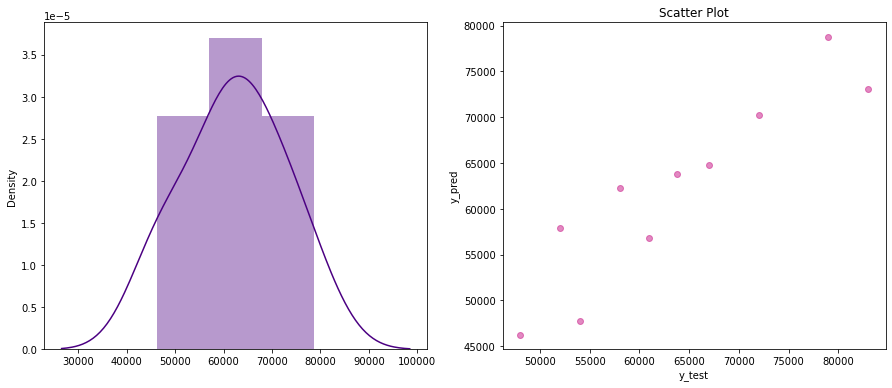

In [199]:
Y_pred_total = reg.predict(X)
plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)
plt.title("Dist Plot")
sns.distplot(Y_pred_total,ax=axis[0], color="INDIGO")
plt.title("Scatter Plot")
plt.scatter(Y,Y_pred_total, alpha=0.5, color="MEDIUMVIOLETRED")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()